In [15]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as  sn


In [3]:

dataset_path = "/content/drive/MyDrive/Data/animal"
idg = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    zoom_range = 0.15,
    rotation_range = 20,
    brightness_range = (0.8, 1.2),
    validation_split = 0.15
)
train_data = idg.flow_from_directory(
    dataset_path,
    target_size = (224, 224,),
    class_mode = "categorical",
    subset = "training"
)

val_data = idg.flow_from_directory(
    dataset_path,
    target_size = (224, 224,),
    class_mode = "categorical",
    subset = "validation"
)

Found 1111 images belonging to 5 classes.
Found 192 images belonging to 5 classes.


In [4]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D(),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(5, activation='softmax')
])

In [5]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)


In [7]:
plt_model = model.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/20
35/35 [==============================] - 34s 969ms/step - loss: 0.9421 - accuracy: 0.5932 - val_loss: 1.1303 - val_accuracy: 0.5208
Epoch 2/20
35/35 [==============================] - 34s 965ms/step - loss: 0.9331 - accuracy: 0.5986 - val_loss: 1.1723 - val_accuracy: 0.5104
Epoch 3/20
35/35 [==============================] - 34s 970ms/step - loss: 0.9033 - accuracy: 0.6301 - val_loss: 1.0884 - val_accuracy: 0.5521
Epoch 4/20
35/35 [==============================] - 34s 972ms/step - loss: 0.8339 - accuracy: 0.6832 - val_loss: 1.0389 - val_accuracy: 0.5781
Epoch 5/20
35/35 [==============================] - 33s 945ms/step - loss: 0.7496 - accuracy: 0.7111 - val_loss: 1.1042 - val_accuracy: 0.5781
Epoch 6/20
35/35 [==============================] - 35s 990ms/step - loss: 0.7129 - accuracy: 0.7210 - val_loss: 1.1036 - val_accuracy: 0.5625
Epoch 7/20
35/35 [==============================] - 33s 949ms/step - loss: 0.6897 - accuracy: 0.7408 - val_loss: 1.0827 - val_accuracy: 0.6146

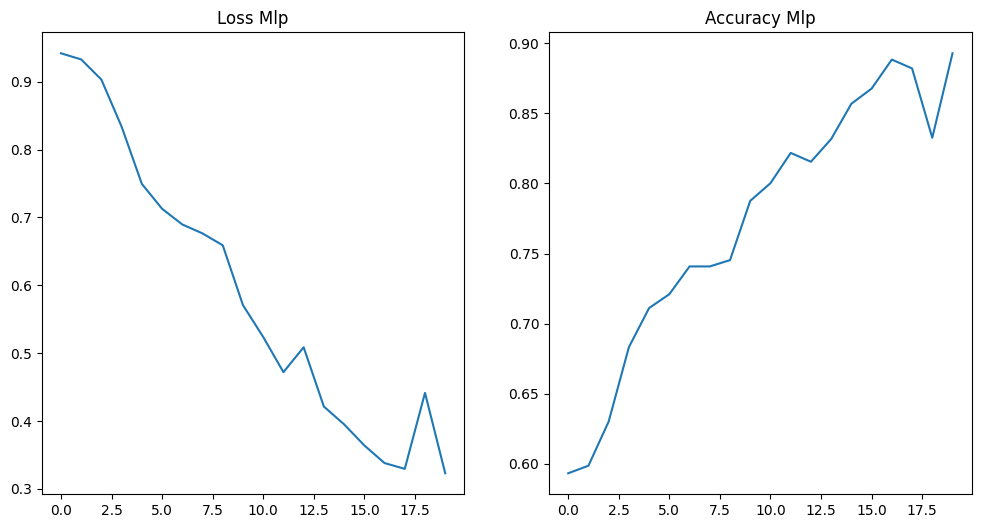

In [8]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(plt_model.history['loss'])
ax1.set_title("Loss Mlp")
ax2.plot(plt_model.history['accuracy'])
ax2.set_title("Accuracy Mlp")
plt.show()

In [9]:
model.save('animalDetector_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 5s 865ms/step


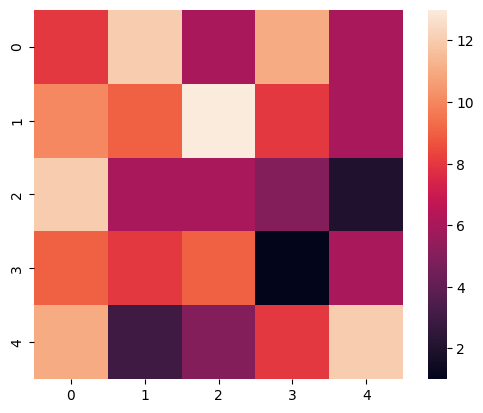

In [16]:

Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred,axis=1)
cof_mat = confusion_matrix(val_data.classes,y_pred)
sn.heatmap(cof_mat)
plt.imshow(cof_mat)

In [18]:

image = cv2.imread("2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
image = image / 255
image = image.reshape(1, 224, 224, 3)

result = model.predict(image)

pred = np.argmax(result)
if pred == 0:
    print(" Elephant 🐘")
elif pred == 1:
    print("dog 🐶")
elif pred == 2:
    print("cat 🐈 ")
elif pred == 3:
    print("Giraffe 🦒")
elif pred == 4:
    print("Pandas 🐼")


1/1 [==============================] - 0s 110ms/step
 Elephant 🐘
